# Newspaper Sentiment Analysis
**TASK:**

Take any newspaper data through their API and classify the sentiment within the articles. Find the topic of the article and the sentiment. Share the github link to codebase.





*   The news data is collected from bbc.co.uk api.
*   The data contains the articles about the **Human Right issues** published after the date 1st December, 2022.
*   The aim is to analyse the sentiments of the top 100 news resullts fetched through the API.

*   The analysis shows the positive, negative and neutral sentiments.
*   The word frequency
*   Finds the title of the article.










In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import requests
from wordcloud import WordCloud
import nltk
import gensim
import re
import seaborn as sns

from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn

from nltk.corpus import stopwords

from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('all')
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
nltk.download('vader_lexicon')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [2]:
url = 'https://newsapi.org/v2/everything?'
api_key = 'eb7fbefd29d14d14a529ead07e91e122' 

In [4]:
def get_articles(file): 
    article_results = [] 
    for i in range(len(file)):
        article_dict = {}
        article_dict['title'] = file[i]['title']
        article_dict['author'] = file[i]['author']
      
        article_dict['description'] = file[i]['description']
        article_dict['content'] = file[i]['content']
        article_dict['pub_date'] = file[i]['publishedAt']
        article_dict['url'] = file[i]["url"]
    
        article_results.append(article_dict)
    return article_results

In [5]:
parameters_headlines = {
    'q': 'Human Rights',
    'sortBy':'popularity',
    'domains' :'bbc.co.uk',
    'pageSize': 100,
    'apiKey': api_key,
    'language': 'en',
    'from' : '2022-12-01'    
}

headline = requests.get(url, params = parameters_headlines)
json_headline = headline.json()


responses = json_headline["articles"]

news = pd.DataFrame(get_articles(responses))
# printing the head to check the format and the working of the get_articles function
news.tail()

,title,author,description,content,pub_date,url
95,The two sides of Scotland's gender law debate,https://www.facebook.com/bbcnews,MSPs are set to decide on the controversial pl...,The diamond grass of Cathkin Park is glinting ...,2022-12-20T23:11:02Z,https://www.bbc.co.uk/news/uk-scotland-64033750
96,The Scotland fans making their mark at the Qat...,https://www.facebook.com/bbcnews,Tartan Army members have made their mark at th...,Most Scotland fans have been assuming a famili...,2022-12-01T00:51:25Z,https://www.bbc.co.uk/news/uk-scotland-63778368
97,Lockerbie bombing suspect due to appear in US ...,https://www.facebook.com/bbcnews,Abi Agila Masud was allegedly a member of the ...,A Libyan man who has been accused of being the...,2022-12-12T14:07:21Z,https://www.bbc.co.uk/news/uk-scotland-63946843
98,Huge backlog in offenders doing community payb...,https://www.facebook.com/bbcnews,The backlog of unpaid work hours that offender...,The backlog of unpaid work that offenders in S...,2022-12-06T23:10:31Z,https://www.bbc.co.uk/news/uk-scotland-63862566
99,Violet Coco: Climate activist's jailing ignite...,https://www.facebook.com/bbcnews,A 15-month sentence given to a protester sends...,"For 28 minutes in April, Deanna ""Violet"" Coco ...",2022-12-08T17:28:50Z,https://www.bbc.co.uk/news/world-australia-638...


In [7]:
news.title.size

100

In [6]:
news.isnull().sum() 

title           0
author         11
description     0
content         0
pub_date        0
url             0
dtype: int64

A total of 11 rows has missing author names.

In [8]:
news['combined_text'] = news['description'].map(str) +" "+ news['content'].map(str) 

In [9]:
news.head()

,title,author,description,content,pub_date,url,combined_text
0,Indonesia 'sex ban': Criminal code changes thr...,https://www.facebook.com/bbcnews,There are concerns the revised criminal code c...,"It has been branded the ""Bali Bonking Ban"". Th...",2022-12-08T00:05:40Z,https://www.bbc.co.uk/news/world-asia-63885435,There are concerns the revised criminal code c...
1,Angelina Jolie steps down as UN refugee envoy,https://www.facebook.com/bbcnews,The Hollywood star says she now wants to work ...,Oscar-winning US actress Angelina Jolie says s...,2022-12-17T05:28:54Z,https://www.bbc.co.uk/news/world-us-canada-640...,The Hollywood star says she now wants to work ...
2,"'It started with a protest, but a revolution i...",https://www.facebook.com/bbcnews,BBC journalists have been able to identify mor...,"""If I don't go out and protest, who else will?...",2022-12-06T01:44:51Z,https://www.bbc.co.uk/news/world-middle-east-6...,BBC journalists have been able to identify mor...
3,Haiti: Inside the capital city taken hostage b...,https://www.facebook.com/bbcnews,"Orla Guerin reports from Port-au-Prince, where...",In Port-au-Prince you cannot see the boundarie...,2022-12-05T06:00:16Z,https://www.bbc.co.uk/news/world-latin-america...,"Orla Guerin reports from Port-au-Prince, where..."
4,Umar Patek: Anger and fear in Australia as Bal...,https://www.facebook.com/bbcnews,Survivors of the 2002 attacks tell the BBC the...,After the deadly bombings on two Bali nightclu...,2022-12-08T03:15:52Z,https://www.bbc.co.uk/news/world-australia-638...,Survivors of the 2002 attacks tell the BBC the...


# Text Preprocessing 

Remove Punctuation, Non ascii character, special character

In [10]:
def removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

Clean the text by changing the words like "what's" to "what is", "'ve" to "have" etc.
Remove the NonAscii characters from the text

In [11]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = removeNonAscii(text)
    text = text.strip()
    return text

Remove stopwords

words that are so frequent in a language that their presence in a text does not contain much meaning regarding the topic of the document. For example, “a”, “why”, “do”, etc. It makes sense to ignore these words.

In [12]:
def remove_stopwords(word_tokens):
    filtered_sentence = [] 
    stop_words = stopwords.words('english')
    specific_words_list = ['char', 'u', 'hindustan', 'doj', 'washington'] 
    stop_words.extend(specific_words_list )
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    return filtered_sentence

Lemmatize the text

The process of finding the lemma of the words. Lemmas are basically the dictionary forms of words. For example, the lemma of “houses” --> “house”, “better” -> “good”, “thought” --> “think”, etc.

In [13]:
def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    return' '.join([lemmatizer.lemmatize(word) for word in x])

Tokenization

A segmentation technique that breaks unstructured (text) data in small pieces of data that can be counted as discrete elements. 

In [14]:
tokenizer = RegexpTokenizer(r'\w+')
def tokenize(x): 
    return tokenizer.tokenize(x)

Lower the text

In [15]:
def lower_the_text():
     news['combined_text'] = news['combined_text'].apply(lambda x: x.lower())

In [16]:
news['combined_text'] = news['combined_text'].map(clean_text)

In [17]:
news['tokens'] = news['combined_text'].map(tokenize)

In [18]:
news['tokens'] = news['tokens'].map(remove_stopwords)

In [19]:
news['lems'] =news['tokens'].map(lemmatize)

In [20]:
news.head()

,title,author,description,content,pub_date,url,combined_text,tokens,lems
0,Indonesia 'sex ban': Criminal code changes thr...,https://www.facebook.com/bbcnews,There are concerns the revised criminal code c...,"It has been branded the ""Bali Bonking Ban"". Th...",2022-12-08T00:05:40Z,https://www.bbc.co.uk/news/world-asia-63885435,there are concerns the revised criminal code c...,"[concerns, revised, criminal, code, could, thr...",concern revised criminal code could threaten d...
1,Angelina Jolie steps down as UN refugee envoy,https://www.facebook.com/bbcnews,The Hollywood star says she now wants to work ...,Oscar-winning US actress Angelina Jolie says s...,2022-12-17T05:28:54Z,https://www.bbc.co.uk/news/world-us-canada-640...,the hollywood star says she now wants to work ...,"[hollywood, star, says, wants, work, groups, l...",hollywood star say want work group led people ...
2,"'It started with a protest, but a revolution i...",https://www.facebook.com/bbcnews,BBC journalists have been able to identify mor...,"""If I don't go out and protest, who else will?...",2022-12-06T01:44:51Z,https://www.bbc.co.uk/news/world-middle-east-6...,bbc journalists have been able to identify mor...,"[bbc, journalists, able, identify, people, kil...",bbc journalist able identify people killed ira...
3,Haiti: Inside the capital city taken hostage b...,https://www.facebook.com/bbcnews,"Orla Guerin reports from Port-au-Prince, where...",In Port-au-Prince you cannot see the boundarie...,2022-12-05T06:00:16Z,https://www.bbc.co.uk/news/world-latin-america...,orla guerin reports from port au prince where ...,"[orla, guerin, reports, port, au, prince, hait...",orla guerin report port au prince haitian live...
4,Umar Patek: Anger and fear in Australia as Bal...,https://www.facebook.com/bbcnews,Survivors of the 2002 attacks tell the BBC the...,After the deadly bombings on two Bali nightclu...,2022-12-08T03:15:52Z,https://www.bbc.co.uk/news/world-australia-638...,survivors of the attacks tell the bbc they do...,"[survivors, attacks, tell, bbc, believe, umar,...",survivor attack tell bbc believe umar patek de...


# Sentiment Analysis

Sentiment Score calculated using VADER Sentiment Intensity Analyser


In [21]:
df = news.drop(['author','pub_date','url'],axis=1)

In [22]:
sent = SentimentIntensityAnalyzer()
polarity = [round(sent.polarity_scores(i)['compound'], 2) for i in df['combined_text']]
df['sentiment_score'] = polarity


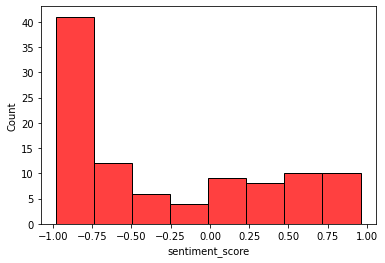

In [23]:
sns.histplot(df.sentiment_score,color='red')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


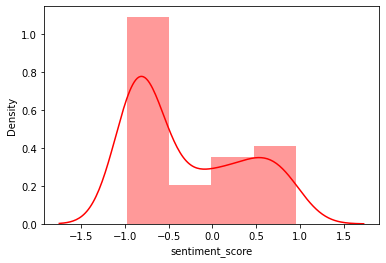

In [33]:
sns.distplot(df.sentiment_score,color='red')

1.   Negative sentiment if sentiment score is between [-1,-0.5]
2.   Neutral sentiment if sentiment score is between [-0.5,0.5]
3.   Negative sentiment if sentiment score is between [0.5,1]

More than 45+ sentiments are Negative.
Approx 35+ sentiments are Neutral.
Approx 20 sentiments are Positive.



In [24]:
#data=news_articles_df
def generate_wordcloud(dataframe):
    stop = ["https", "co", "char","chars"] + list(STOPWORDS)
    wc = WordCloud(stopwords=stop, max_words=700, margin=10, background_color='black',scale=3, relative_scaling = 0.4, width=500, height=400,
    random_state=1).generate(' '.join(dataframe['combined_text']))
    plt.figure(figsize=(10,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [35]:
df.head()

,title,description,content,combined_text,tokens,lems,sentiment_score
0,Indonesia 'sex ban': Criminal code changes thr...,There are concerns the revised criminal code c...,"It has been branded the ""Bali Bonking Ban"". Th...",there are concerns the revised criminal code c...,"[concerns, revised, criminal, code, could, thr...",concern revised criminal code could threaten d...,-0.78
1,Angelina Jolie steps down as UN refugee envoy,The Hollywood star says she now wants to work ...,Oscar-winning US actress Angelina Jolie says s...,the hollywood star says she now wants to work ...,"[hollywood, star, says, wants, work, groups, l...",hollywood star say want work group led people ...,0.06
2,"'It started with a protest, but a revolution i...",BBC journalists have been able to identify mor...,"""If I don't go out and protest, who else will?...",bbc journalists have been able to identify mor...,"[bbc, journalists, able, identify, people, kil...",bbc journalist able identify people killed ira...,-0.84
3,Haiti: Inside the capital city taken hostage b...,"Orla Guerin reports from Port-au-Prince, where...",In Port-au-Prince you cannot see the boundarie...,orla guerin reports from port au prince where ...,"[orla, guerin, reports, port, au, prince, hait...",orla guerin report port au prince haitian live...,-0.97
4,Daniel Duggan: US formally requests ex-marine'...,Daniel Duggan is accused of breaking American ...,The US has asked Australia to extradite a form...,daniel duggan is accused of breaking american ...,"[daniel, duggan, accused, breaking, american, ...",daniel duggan accused breaking american arm co...,-0.70


In [25]:
negative_df = df[(df['sentiment_score']>-1) & (df['sentiment_score'] <-0.5)]
positive_df = df[(df['sentiment_score']>0.5)]
neutral_df = df[(df['sentiment_score']>-0.5) & (df['sentiment_score'] <0.5)]

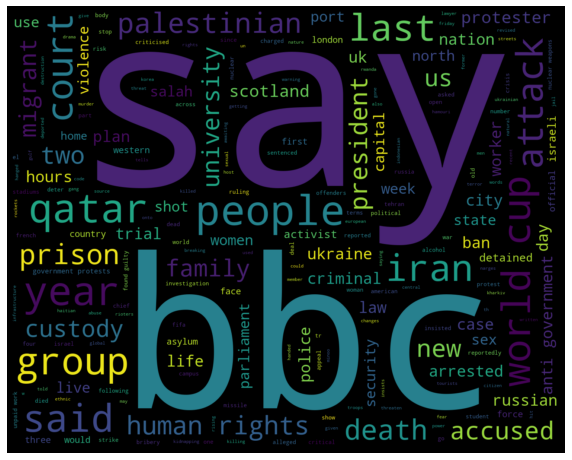

In [26]:
generate_wordcloud(negative_df)



*   The Negative news contains words like IRAN because of the ongoing protest in Iran because of Hijab protest
*  President, capital symbolizes the Capitol Hill protest happend in the US.
*   Also it contains words like violence, women, russians











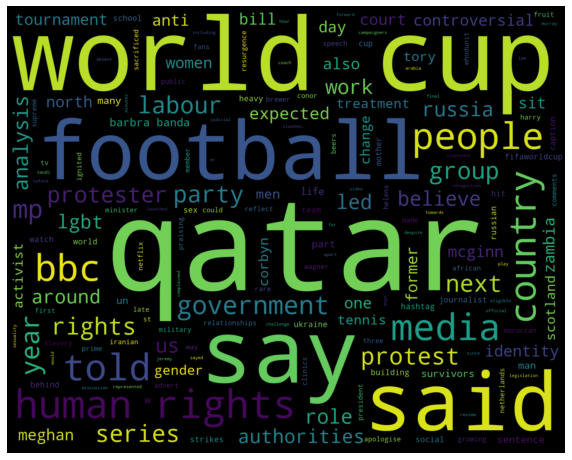

In [27]:
generate_wordcloud(neutral_df)

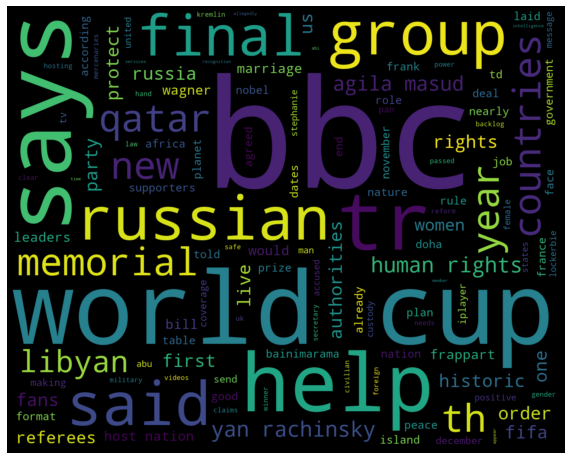

In [28]:
generate_wordcloud(positive_df)


*   The Positive news contains words like World Cup, help, memorial etc

**Since the analysis is done on only 100 news, the wordcloud contains less different words but it provides the necessary information.**

In [50]:
from matplotlib import pyplot as plt

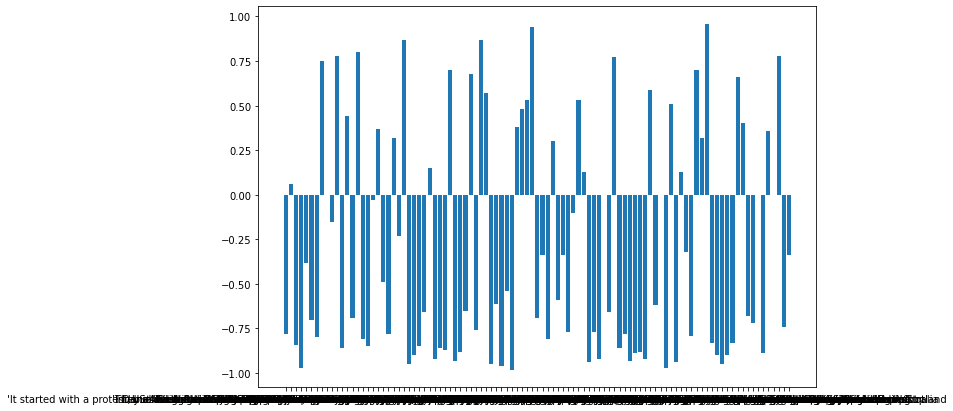

In [51]:
headline = df['title']
sentiment_score = df['sentiment_score']
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(headline,sentiment_score  )
 
# Show Plot
plt.show()